# Heat Transfer in Materials - Modeling Heat Pulse in ceramics, metals and polymers

### In this notebook you will use the heat equations you learned in your background readings and apply them to modeling the expected heat impulses.  Thinking back to the reading, you will notice these two equations related to conductivity and diffusivity. ![Diffusion Equation](attachment:Heat.PNG)

### You will also need to use this equation to model the flow over the length of the material. ![Partial Derv](attachment:Heat2.PNG)

#### This first block of code will explain how to write a program to model the heat flow over some length of material.

In [3]:
# Import the libraries you need
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib.animation as animation


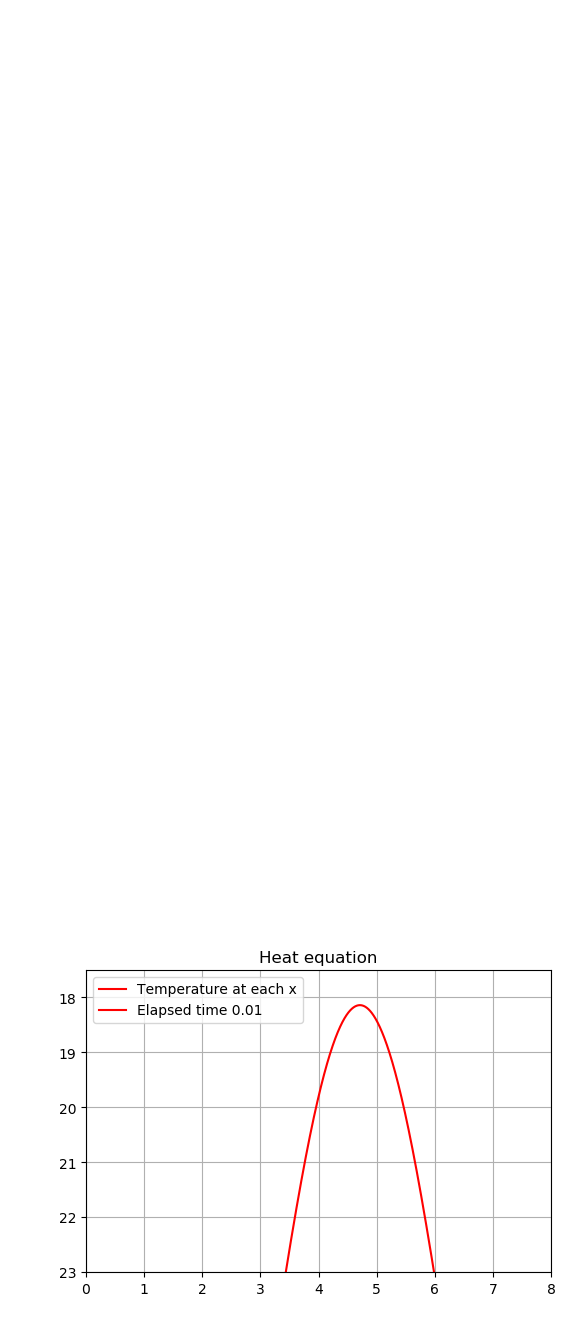

In [4]:
# This program is based on a git https://gist.github.com/mick001/53c26a1022137657afbd

#This is for 1010 Steel
#Setting up the figure you want to plot
fig = plt.figure()
fig.set_dpi(100)
ax1 = fig.add_subplot(1,1,1)

# Setting up the Diffusion constant
k = 2

#Setting a visualization scaling factor so you can see the pulse
scale =7

#Length of the rod (0,L) on the x axis
L = 8

#Initial contitions u(0,t) = u(L,t) = 0. Temperature at x=0 and x=L is fixed
x0 = np.linspace(0,L+1,10000)
t0 = 0
temp0 = 25  #Temperature of the rod at rest (before heating)

#Increment
dt = 0.01

#Heat function (see the diffusion equation)
def u(x,t):
    return temp0 + scale*np.exp(-k*t)*np.sin(x)

#Gradient of u
def grad_u(x,t):
                               #du/dx              #du/dt
    return scale*np.array([np.exp(-k*t)*np.cos(x),-k*np.exp(-k*t)*np.sin(x)])

a = []
t = []

for i in range(500):
    value = u(x0,t0) + grad_u(x0,t0)[1]*dt
    t.append(t0)
    t0 = t0 + dt
    a.append(value)

#This sets up the animation feature for the program

k = 0
def animate(i):         #The plot shows the temperature evolving with time
    global k            #at each point x in the rod
    x = a[k]            #The ends of the rod are kept at temperature temp0
    k += 1              #The rod is heated in one spot, then it cools down
    ax1.clear()
    plt.plot(x0,x,color='red',label='Temperature at each x')
    plt.plot(0,0,color='red',label='Elapsed time '+str(round(t[k],2)))
    plt.grid(True)
    plt.ylim([temp0-2,2.5*scale])
    plt.xlim([0,L])
    plt.title('Heat equation')
    plt.legend()
    
anim = animation.FuncAnimation(fig,animate,frames=360,interval=20)
plt.show()

#### So one can see, over the length of the material (bar, rod) that heat will travel as a pulse. 

### Now you will take the equation and make it more specific to the materials in your table and model the heat pulse in these materials. This code is adapted from  https://scipython.com/resources/examples/the-one-dimensional-diffusion-equation/¶
#### This is different from the time evolving plot in the first code block. This one takes a snapshot of the heat pulse at three different times.

(296.1217173008038, 381.44393668311983) (291.6198730442708, 475.9826660703137)
(298.7729564260953, 325.76791505199964) (297.3434691800467, 355.787147219019)
(299.6411798769103, 308.14755232319357) (299.1597253051225, 317.6457685930114)


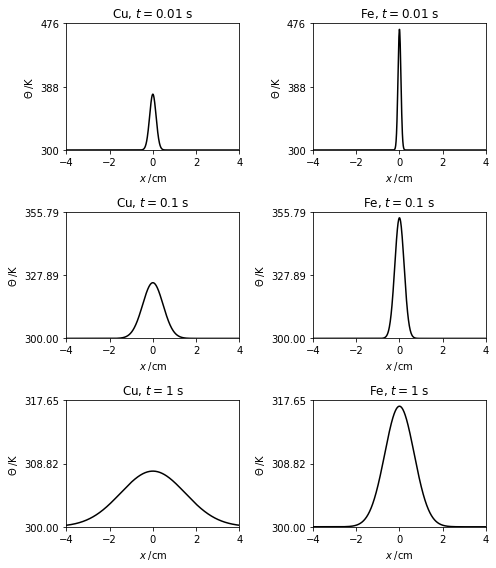

In [6]:
#Modeling the difference between copper and iron

# Cross sectional area of bar in m3, heat added at x=0 in J
A, H = 1.e-4, 1.e3

# Temperature in K at t=0
theta0 = 300

# Metal element symbol, specific heat capacities per unit volume (J.m-3.K-1),
# Thermal diffusivities (m2.s-1) for Cu and Fe
metals = np.array([('Cu', 3.45e7, 1.11e-4), ('Fe', 3.50e7, 2.3e-5)],
                  dtype=[('symbol', '|S2'), ('cp', 'f8'), ('D', 'f8')])

# The metal bar extends from -xlim to xlim (m)
xlim, nx = 0.05, 1000
x = np.linspace(-xlim, xlim, nx)

# Calculate the temperature distribution at these three times (to show heat evolution)
times = (1e-2, 0.1, 1)

# Create our subplots: three rows of times, one column for each metal
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 8))
for j, t in enumerate(times):
    for i, metal in enumerate(metals):
        symbol, cp, D = metal
        ax = axes[j, i]
        # The solution to the diffusion equation
        theta = theta0 + H/cp/A/np.sqrt(D*t * 4*np.pi) * np.exp(-x**2/4/D/t)
        # Plot, converting distances to cm and add some labelling
        ax.plot(x*100, theta, 'k')
        ax.set_title('{}, $t={}$ s'.format(symbol.decode('utf8'), t))
        ax.set_xlim(-4, 4)
        ax.set_xlabel('$x\;/\mathrm{cm}$')
        ax.set_ylabel('$\Theta\;/\mathrm{K}$')

# Set up the y axis so that each metal has the same scale at the same t
for j in (0,1,2):
    ymax = max(axes[j,0].get_ylim()[1], axes[j,1].get_ylim()[1])
    print(axes[j,0].get_ylim(), axes[j,1].get_ylim())
    for i in (0,1):
        ax = axes[j,i]
        ax.set_ylim(theta0, ymax)
        # Ensure there are only three y-tick marks
        ax.set_yticks([theta0, (ymax + theta0)/2, ymax])
        
# We don't want the subplots to bash into each other: tight_layout() fixes this
fig.tight_layout()
plt.show()

## Your Code Requirement - Rename this notebook with the name_your initials. 
#### 1.  Make a new code block and plot each of the materials in your table for the time evolution peak by changing the diffusion constant. You may need to change the scale.
#### 2. Make a new code block and plot each of the materials (either alone or in an array) for the three time snapshots.  
#### 3. Make sure to save all figures (add the code) so that you can create your assignment for the class.